In [33]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [34]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
#mu = 2.0
#variance = 2.0
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [35]:
# proposal function q(x'|x)
def q(x):
    # draw from a multivariate gaussian with mean [0,0] and covariance matrix I
    # Add the randomly drawn number to x and return the sum
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [1.0,0.0], [0.0,1.0] ])
    q = stats.multivariate_normal.rvs(mean =mu, cov=sigma)
    return x + q

Part (a)

In [36]:
# density function f(x)
# takes a vector x = (x1, x2) as input
def f(x):
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [2.0,1.2], [1.2,2.0] ])
    return stats.multivariate_normal.pdf(x, mean=mu, cov=sigma)
# returns value of the multivariate gaussian associated with the given x

In [37]:
# Array of x-values, initialized with the zero vector [0,0]
xs = [[0.0,0.0]]
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

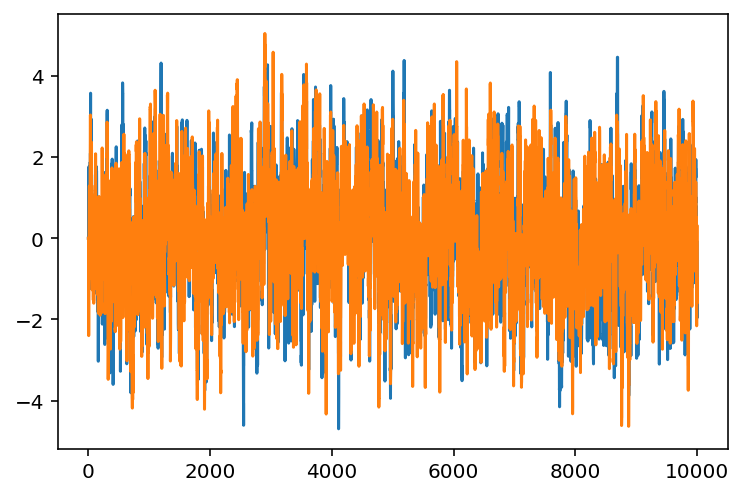

In [38]:
plot(xs)

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


(array([0.00268489, 0.00722856, 0.013631  , 0.0320122 , 0.05844809,
        0.12061373, 0.16894183, 0.2149981 , 0.26539151, 0.27633761,
        0.26683722, 0.22202013, 0.17369203, 0.10925456, 0.06608971,
        0.03862118, 0.0183812 , 0.00640244, 0.0020653 , 0.00185877]),
 array([-4.63387467, -4.14973275, -3.66559084, -3.18144893, -2.69730702,
        -2.2131651 , -1.72902319, -1.24488128, -0.76073937, -0.27659745,
         0.20754446,  0.69168637,  1.17582829,  1.6599702 ,  2.14411211,
         2.62825402,  3.11239594,  3.59653785,  4.08067976,  4.56482167,
         5.04896359]),
 <a list of 20 Patch objects>)

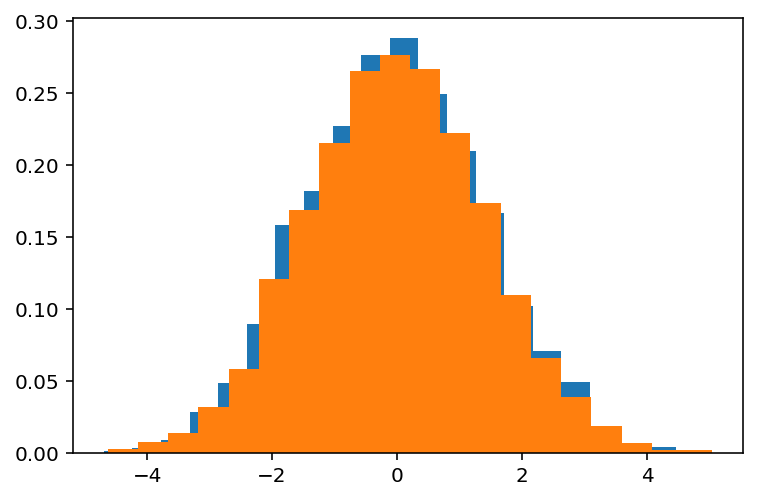

In [39]:
# Extract x- and y-coordinates from the array of vectors
x_axis = []
y_axis = []
for i in xs:
    x_axis.append(i[0])
    y_axis.append(i[1])

# Generate 1-dimensional histograms
hist(x_axis, normed=True, bins=20)
hist(y_axis, normed=True, bins=20)

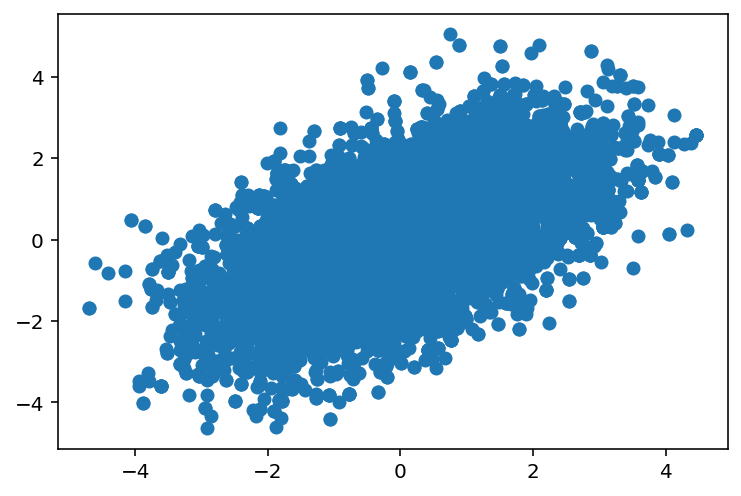

In [40]:
# Generate Scatter plot
scatter(x_axis, y_axis)

show()

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


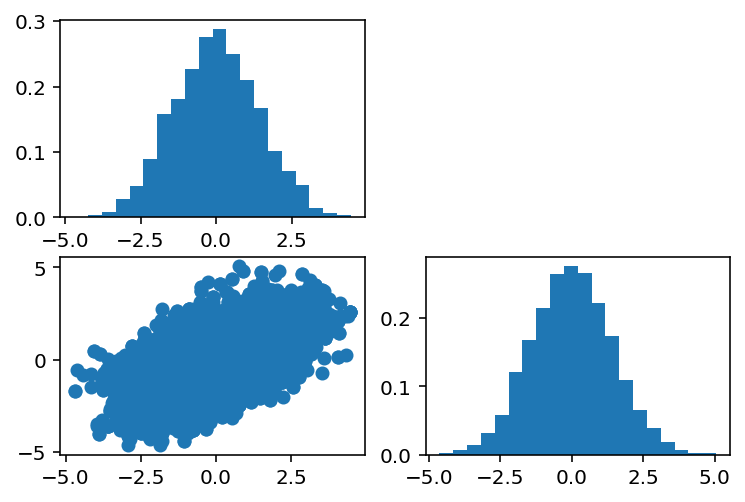

In [41]:
# histogram of x values
subplot(221)
hist(x_axis, normed=True, bins=20)

#Scatter plot
subplot(223)
scatter(x_axis, y_axis)

# histogram of y values
subplot(224)
hist(y_axis, normed=True, bins=20)

show()